# GAN

In [38]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np

In [39]:
import tensorflow

In [40]:
tensorflow.__version__

'1.5.0'

In [41]:
import keras

In [42]:
keras.__version__

'2.2.3'

Load the MNIST dataset

In [43]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
# Rescale -1 to 1
X_train = x_train / 127.5 - 1.
X_train = np.expand_dims(x_train, axis=3)

In [45]:
X_train.shape

(60000, 28, 28, 1)

In [46]:
x_test.shape

(10000, 28, 28)

In [47]:
y_train[46]

8

In [48]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [49]:
X_train[1].shape

(28, 28, 1)

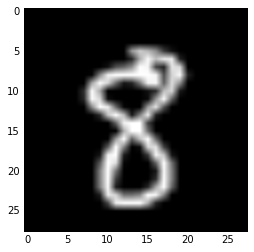

In [50]:
plt.imshow(X_train[46].reshape(28,28))
plt.gray()
plt.show()

##### 1. Create a generator model
The generator has the following layers :
    - A dense layer of width 256 and take as input the dimension of the latent space (this is a paremeter that must be configurable
    - A LeakyRelu activation with parameter alpha=0.2 : what does it correspond to ?
    - We use batch normalization of momentum 0.8 : what does it correspond to ?
    
    - A second dense layer of width 512
    - We use same LeakyRelu and batch normalization for this layer
    
    - A third Dense Layer of width 1024 with same batch normalization and LeakyRelu activation
    
    - A last dense layer with width equal to the shape of the output image flattened
    - The activation is tanh : what does is correspond to ?
    
    The function must take as input a vector of dimension the dimension of the latent space and representing the noise and return Model

In [51]:
def build_generator(img_shape,latent_dim=100):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    
    model.add(Reshape(img_shape))
    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

In [52]:
gen=build_generator(img_shape=img_shape)

In [35]:
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28, 1)         1493520   
Total params: 1,493,520
Trainable params: 1,489,936
Non-trainable params: 3,584
_________________________________________________________________


##### 2. Build the discriminator
The discriminator has the following layers :
    - A Dense layer of width 512 with LeakyRelu activation with parameter alpha=0.2
    - A second Dense layer with LeakyRelu activation with parameter alpha=0.2
    - A last Dense layer for the binary classification 
    
    The model must take as input an image and output the the classification result

##### 3. Build the two neural networks with the MNIST configuration and print their properties. We will use a dimension of the latent space equa to 100

##### 4. Compile the model

The optimizer chosen is 'Adam' with parameters 0.0002 and 0.5 : what does it correspond to ?

First compile the discriminator

To compile the generator it is more tricky : (live explanations)

In [ ]:
# The generator takes noise as input and generates imgs
z = Input(shape=(100,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

##### 5. Write a function that sample 25 images from a normal noise $\mathcal{N}(0,I_{d})$ with d configurable. It should be configurable wether we save or plot the images

##### 6. Train the model using batch_size of 32 and 10000 epochs

##### 7. Sample 25 generated images and plot the loss curves